In [1]:
import pandas as pd
import numpy as np

In [2]:
training_file_name = 'customer_churn_dataset-training-master.csv'

In [3]:
try:
  df_train = pd.read_csv(training_file_name)
  print("Training dataset loaded successfully!")
except FileNotFoundError:
  print(f"Error: The file '{training_file_name}' was not found in the Colab session storage.")
  print("Please make sure you have uploaded it and the filename matches exactly.")
except Exception as e:
  print(f"An error occurred while loading the training dataset: {e}")

if 'df_train' in locals() and df_train is not None:
  print("\nFirst 5 rows of the training dataset:")
  print(df_train.head())

Training dataset loaded successfully!

First 5 rows of the training dataset:
   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2     

In [4]:
if 'df_train' in locals() and df_train is not None:
  print("\nShape of the training dataset (rows, columns ) (df_train.shape):")
  print(df_train.shape)


Shape of the training dataset (rows, columns ) (df_train.shape):
(440833, 12)


In [5]:
  print("\nInformation about the training dataset (df_train.info()):")
  print(df_train.info())


Information about the training dataset (df_train.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB
None


In [6]:
  print("\nDescriptive statistics for numerical columns (df_train.describe()):")
  print(df_train.describe())


Descriptive statistics for numerical columns (df_train.describe()):
          CustomerID            Age         Tenure  Usage Frequency  \
count  440832.000000  440832.000000  440832.000000    440832.000000   
mean   225398.667955      39.373153      31.256336        15.807494   
std    129531.918550      12.442369      17.255727         8.586242   
min         2.000000      18.000000       1.000000         1.000000   
25%    113621.750000      29.000000      16.000000         9.000000   
50%    226125.500000      39.000000      32.000000        16.000000   
75%    337739.250000      48.000000      46.000000        23.000000   
max    449999.000000      65.000000      60.000000        30.000000   

       Support Calls  Payment Delay    Total Spend  Last Interaction  \
count  440832.000000  440832.000000  440832.000000     440832.000000   
mean        3.604437      12.965722     631.616223         14.480868   
std         3.070218       8.258063     240.803001          8.596208   
min

In [7]:
  print("\nDescriptive statistics for ALL columns (df_train.describe(include='all))")
  print(df_train.describe(include='all'))


Descriptive statistics for ALL columns (df_train.describe(include='all))
           CustomerID            Age  Gender         Tenure  Usage Frequency  \
count   440832.000000  440832.000000  440832  440832.000000    440832.000000   
unique            NaN            NaN       2            NaN              NaN   
top               NaN            NaN    Male            NaN              NaN   
freq              NaN            NaN  250252            NaN              NaN   
mean    225398.667955      39.373153     NaN      31.256336        15.807494   
std     129531.918550      12.442369     NaN      17.255727         8.586242   
min          2.000000      18.000000     NaN       1.000000         1.000000   
25%     113621.750000      29.000000     NaN      16.000000         9.000000   
50%     226125.500000      39.000000     NaN      32.000000        16.000000   
75%     337739.250000      48.000000     NaN      46.000000        23.000000   
max     449999.000000      65.000000     NaN  

In [8]:
  print("\nMissing values in each column of the training dataset (df_train.isnull().sum()):")
  print(df_train.isnull().sum())


Missing values in each column of the training dataset (df_train.isnull().sum()):
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [9]:
print("Row(s) with missing CustomerID:")
print(df_train[df_train['CustomerID'].isnull()])

Row(s) with missing CustomerID:
        CustomerID  Age Gender  Tenure  Usage Frequency  Support Calls  \
199295         NaN  NaN    NaN     NaN              NaN            NaN   

        Payment Delay Subscription Type Contract Length  Total Spend  \
199295            NaN               NaN             NaN          NaN   

        Last Interaction  Churn  
199295               NaN    NaN  


In [10]:
rows_with_any_missing = df_train[df_train.isnull().any(axis=1)]
print(f"\nNumber of rows with at least one missing value: {len(rows_with_any_missing)}")
if len(rows_with_any_missing) ==1:
  print("As expected, all missing alues appear to be in a single row.")
df_train.dropna(inplace=True)
print("\nMissing values after df_train.dropna():")
print(df_train.isnull().sum())


Number of rows with at least one missing value: 1
As expected, all missing alues appear to be in a single row.

Missing values after df_train.dropna():
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [11]:
print("\nNew shape after dropping missing values (df_train.shape):")
print((df_train.shape))


New shape after dropping missing values (df_train.shape):
(440832, 12)


In [12]:
df_train['CustomerID'] = df_train['CustomerID'].astype(int)
df_train['Churn']=df_train['Churn'].astype(int)
print("\nData types after adjustment (df_train.dtypes):")
print(df_train.dtypes)
print("\nFirst 5 rows of the training dataset after adjustment:")
print(df_train.head())


Data types after adjustment (df_train.dtypes):
CustomerID             int64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                  int64
dtype: object

First 5 rows of the training dataset after adjustment:
   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           2  30.0  Female    39.0             14.0            5.0   
1           3  65.0  Female    49.0              1.0           10.0   
2           4  55.0  Female    14.0              4.0            6.0   
3           5  58.0    Male    38.0             21.0            7.0   
4           6  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard      

In [13]:
duplicate_rows =df_train.duplicated().sum()
print(f"  Number of duplicate rows in the training dataset: {duplicate_rows}")

if duplicate_rows>0:
  df_train.drop_duplication(keep='first',inplace=True)
  print(f"Removed {duplicate_rows} duplicate rows.")
  print("\nNew shape after dropping duplicates(df_train.shape):")
  print(df_train.shape)
else:
  print(print("No duplicate rows found."))

  Number of duplicate rows in the training dataset: 0
No duplicate rows found.
None


In [14]:
# Add this in a new cell RIGHT BEFORE your pd.get_dummies line
print(f"Shape of df_train JUST BEFORE pd.get_dummies: {df_train.shape}")

Shape of df_train JUST BEFORE pd.get_dummies: (440832, 12)


In [15]:
categorical_cols =['Gender', 'Subscription Type', 'Contract Length']

print(f"Original categorical columns: {categorical_cols}")
print(f"Shape of DataFrame before one-hot encoding: {df_train.shape}")

df_train_encoded =pd.get_dummies(df_train, columns=categorical_cols, drop_first=True)

print(f"\nShape of DataFrame after one-hot encoding: {df_train_encoded.shape}")
print("\nFirst 5 rows of the encoded training dataset:")
print(df_train_encoded.head())

print("\nNew column names after encoding:")
print(df_train_encoded.columns.tolist())

df_train=df_train_encoded

Original categorical columns: ['Gender', 'Subscription Type', 'Contract Length']
Shape of DataFrame before one-hot encoding: (440832, 12)

Shape of DataFrame after one-hot encoding: (440832, 14)

First 5 rows of the encoded training dataset:
   CustomerID   Age  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0           2  30.0    39.0             14.0            5.0           18.0   
1           3  65.0    49.0              1.0           10.0            8.0   
2           4  55.0    14.0              4.0            6.0           18.0   
3           5  58.0    38.0             21.0            7.0            7.0   
4           6  23.0    32.0             20.0            5.0            8.0   

   Total Spend  Last Interaction  Churn  Gender_Male  \
0        932.0              17.0      1        False   
1        557.0               6.0      1        False   
2        185.0               3.0      1        False   
3        396.0              29.0      1         True   
4        

In [16]:
if 'CustomerID' in df_train.columns:
    df_train.drop('CustomerID', axis=1, inplace=True)
    print("\n'CustomerID' column dropped.")
    print(f"Shape of DataFrame after dropping CustomerID: {df_train.shape}")
    print("\nFirst 5 rows after dropping CustomerID:")
    print(df_train.head())
else:
    print("\n'CustomerID' column not found or already removed.")


'CustomerID' column dropped.
Shape of DataFrame after dropping CustomerID: (440832, 13)

First 5 rows after dropping CustomerID:
    Age  Tenure  Usage Frequency  Support Calls  Payment Delay  Total Spend  \
0  30.0    39.0             14.0            5.0           18.0        932.0   
1  65.0    49.0              1.0           10.0            8.0        557.0   
2  55.0    14.0              4.0            6.0           18.0        185.0   
3  58.0    38.0             21.0            7.0            7.0        396.0   
4  23.0    32.0             20.0            5.0            8.0        617.0   

   Last Interaction  Churn  Gender_Male  Subscription Type_Premium  \
0              17.0      1        False                      False   
1               6.0      1        False                      False   
2               3.0      1        False                      False   
3              29.0      1         True                      False   
4              20.0      1         True      

Distribution of the Churn variable:
Churn
1    56.71072
0    43.28928
Name: proportion, dtype: float64


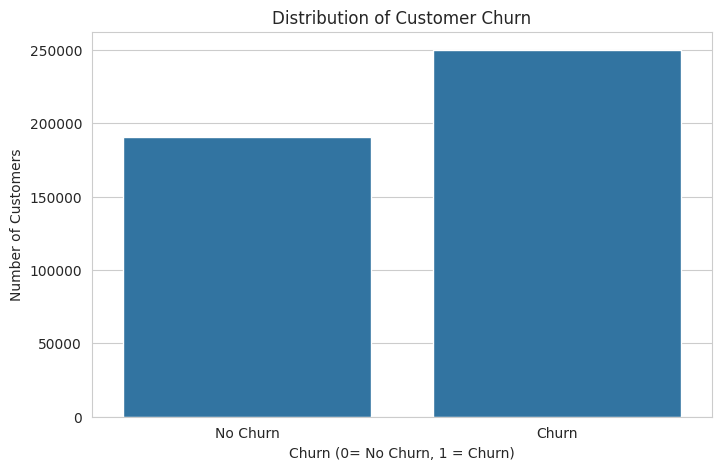

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

print("Distribution of the Churn variable:")
print(df_train['Churn'].value_counts(normalize=True)*100)

plt.figure()
sns.countplot(x='Churn',data=df_train)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn (0= No Churn, 1 = Churn)')
plt.ylabel('Number of Customers')
plt.xticks([0,1],['No Churn','Churn'])
plt.show()

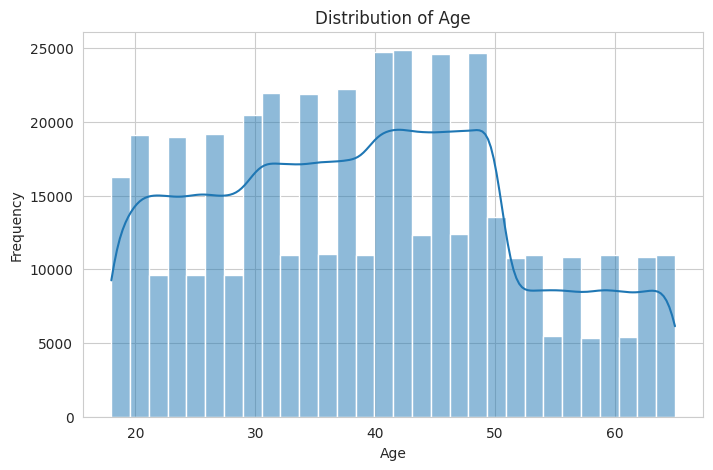

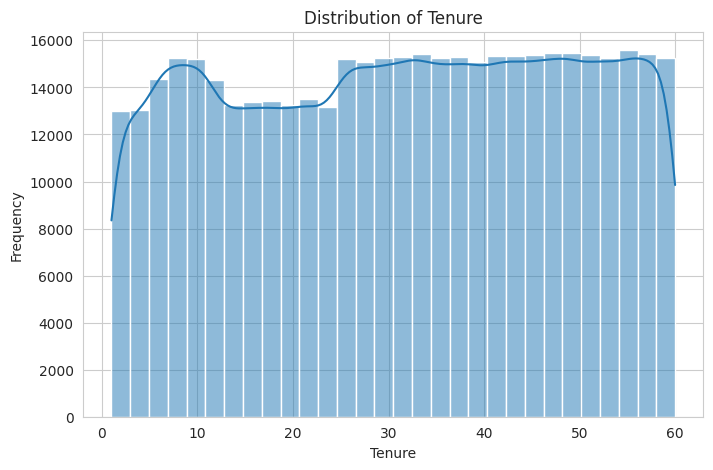

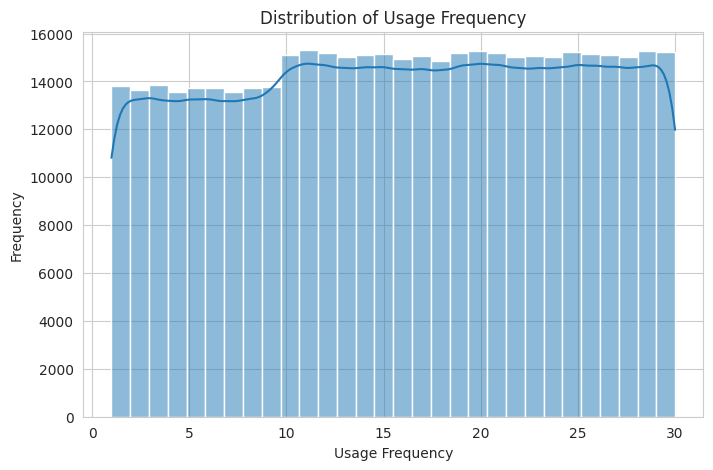

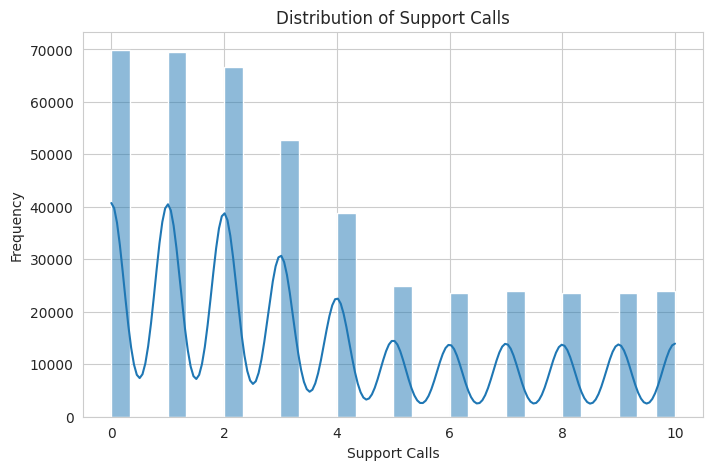

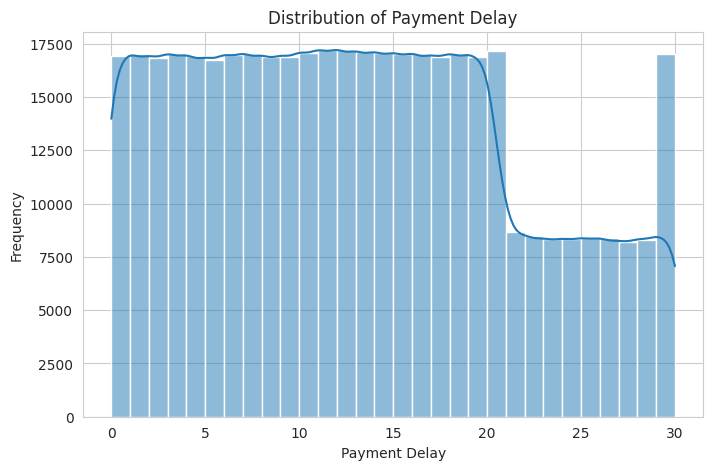

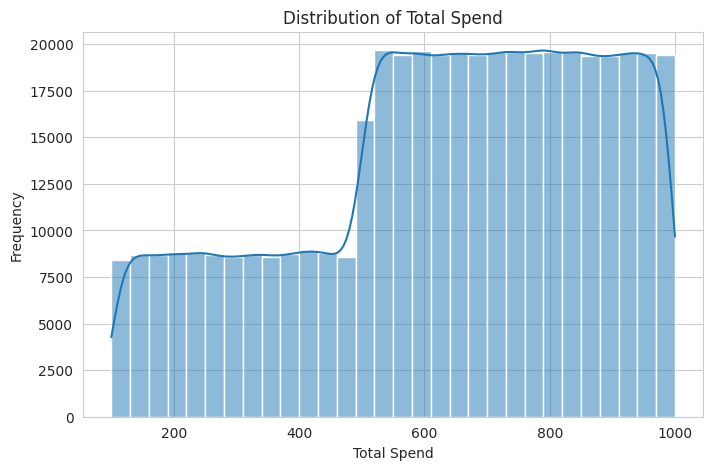

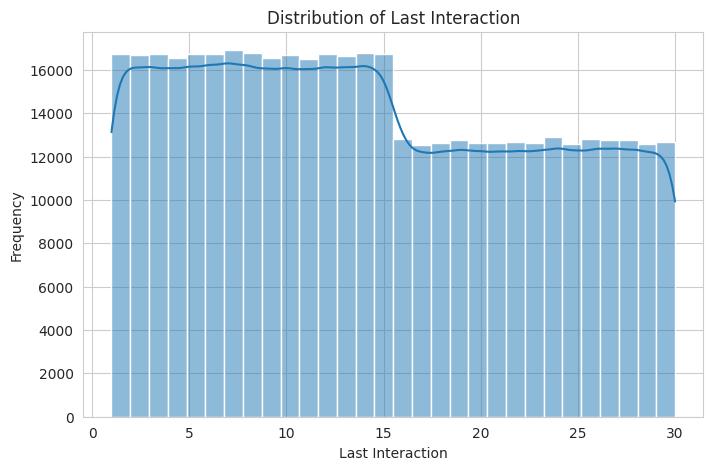

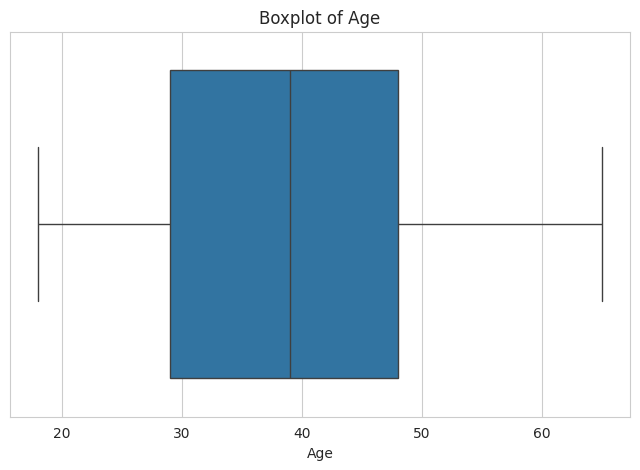

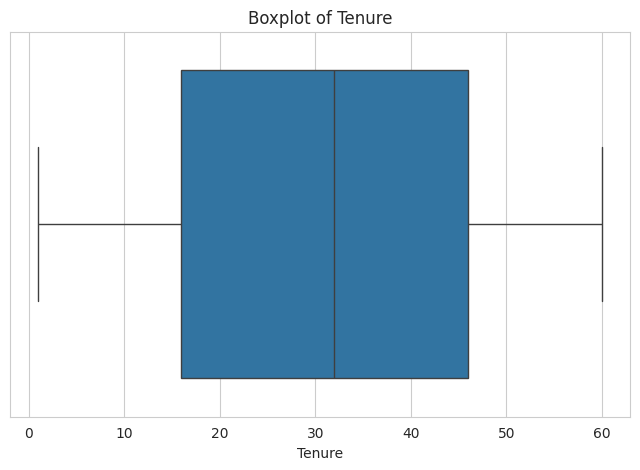

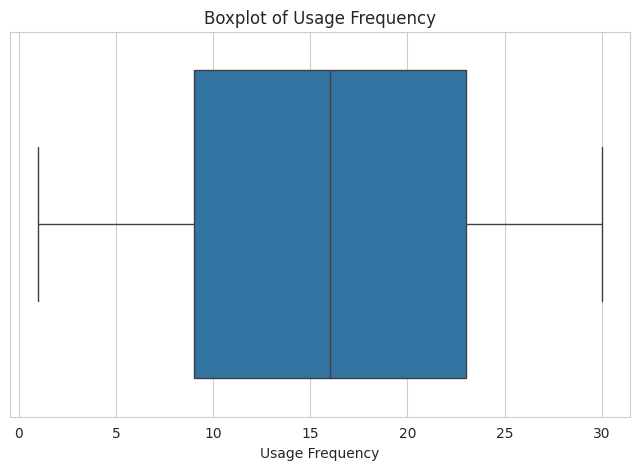

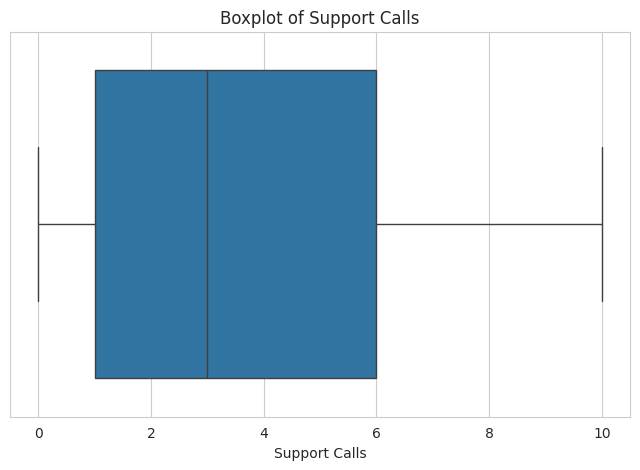

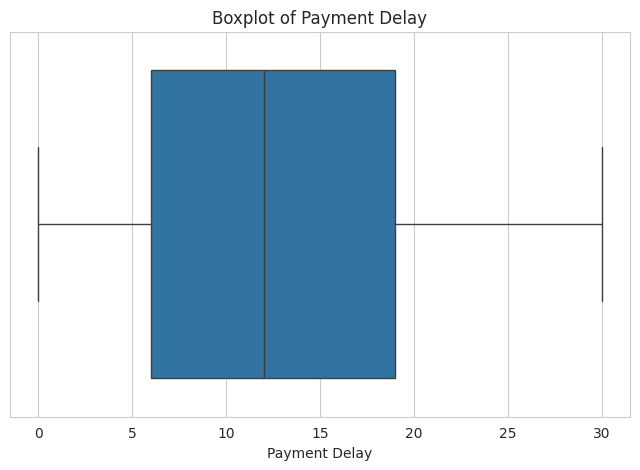

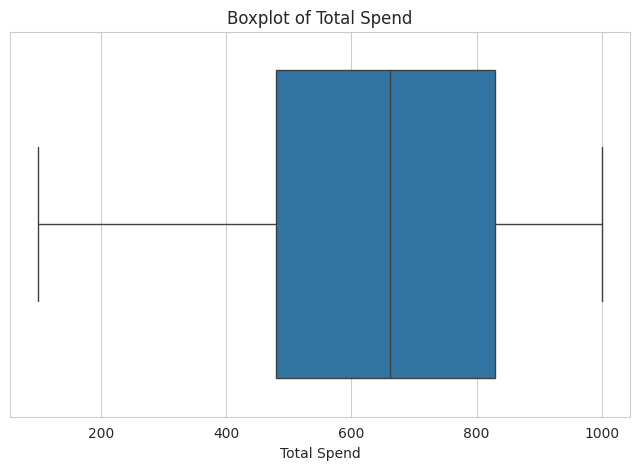

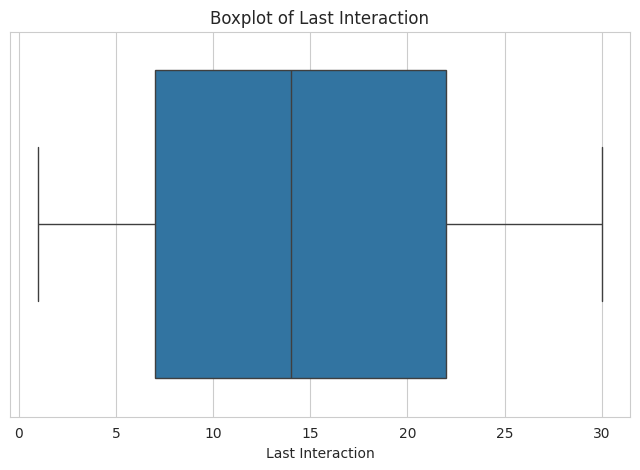

In [18]:
original_numerical_cols = ['Age','Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay','Total Spend', 'Last Interaction']

for col in original_numerical_cols:
  plt.figure()
  sns.histplot(df_train[col], kde=True, bins=30)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

for col in original_numerical_cols:
  plt.figure()
  sns.boxplot(x=df_train[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.show()

In [19]:
if 'Gender_Male' in df_train.columns:
  male_proportion = df_train['Gender_Male'].mean()
  print(f"Proportion of Males: {male_proportion:.2%}")
  print(f"Proportion of Females: {1-male_proportion:.2%}")

print("\nOne hot encoded columns present:")
encoded_cols_present = [col for col in df_train.columns if '_' in col and ('Gender_' in col or 'Subscription Type_' in col or 'Contract Length_' in col )]
print(encoded_cols_present)

Proportion of Males: 56.77%
Proportion of Females: 43.23%

One hot encoded columns present:
['Gender_Male', 'Subscription Type_Premium', 'Subscription Type_Standard', 'Contract Length_Monthly', 'Contract Length_Quarterly']


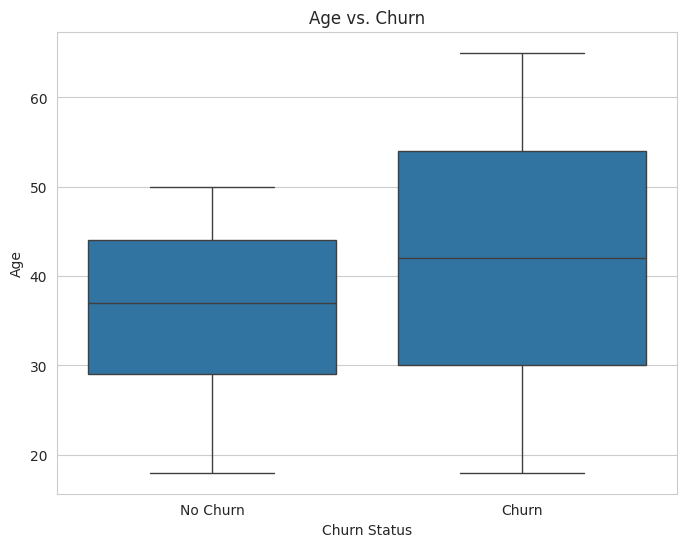

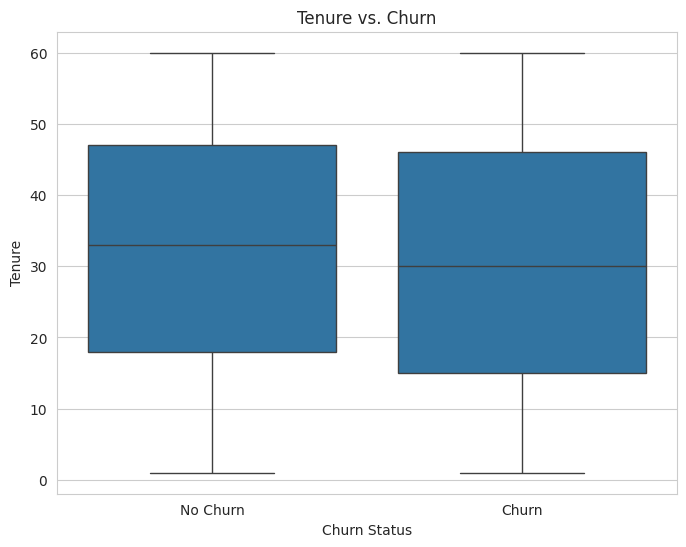

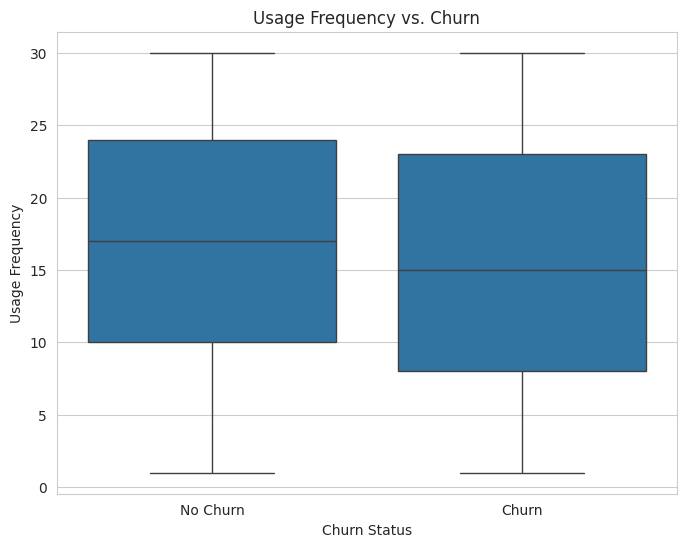

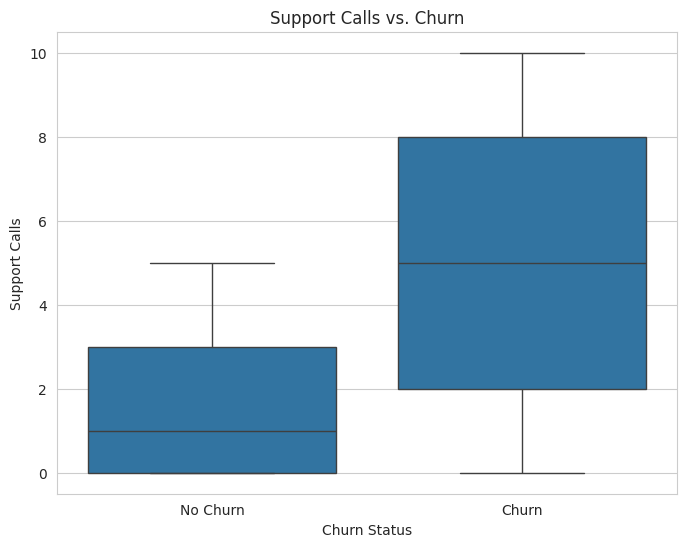

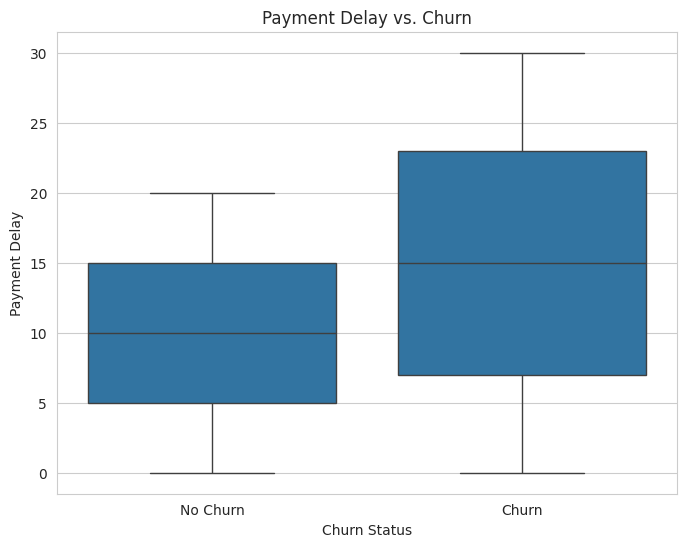

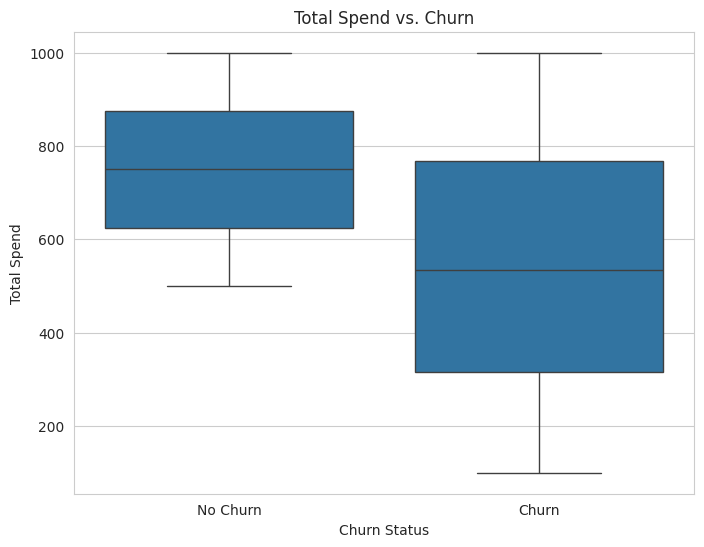

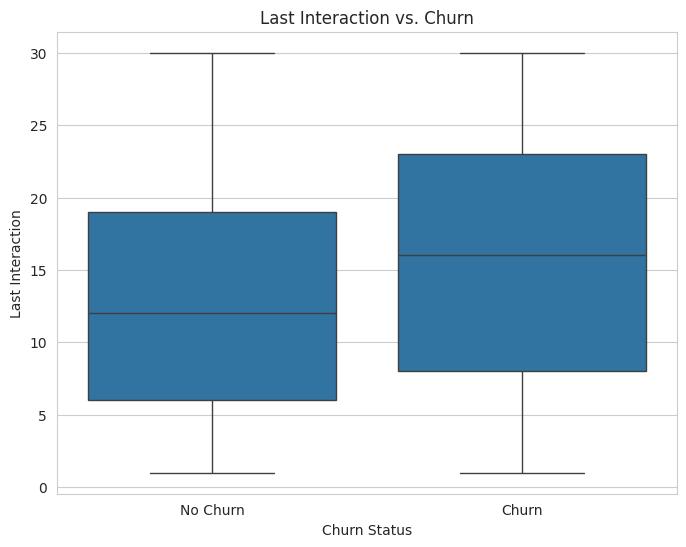

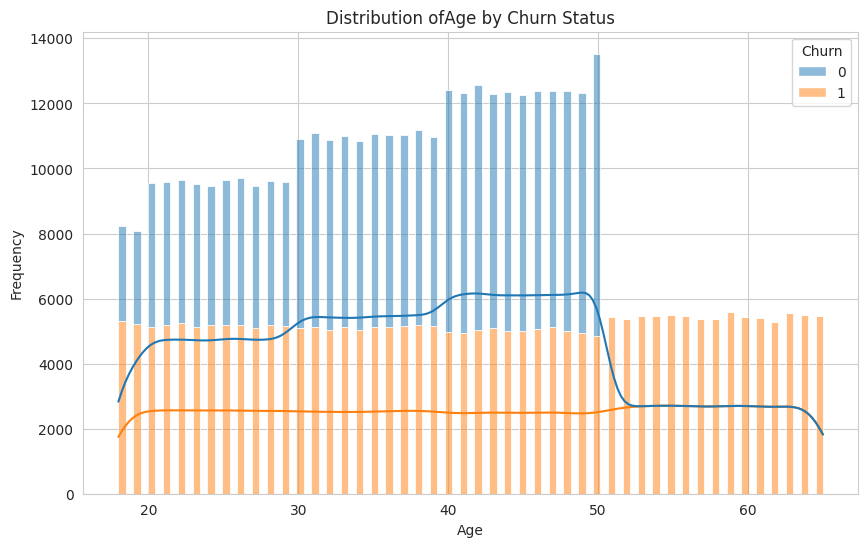

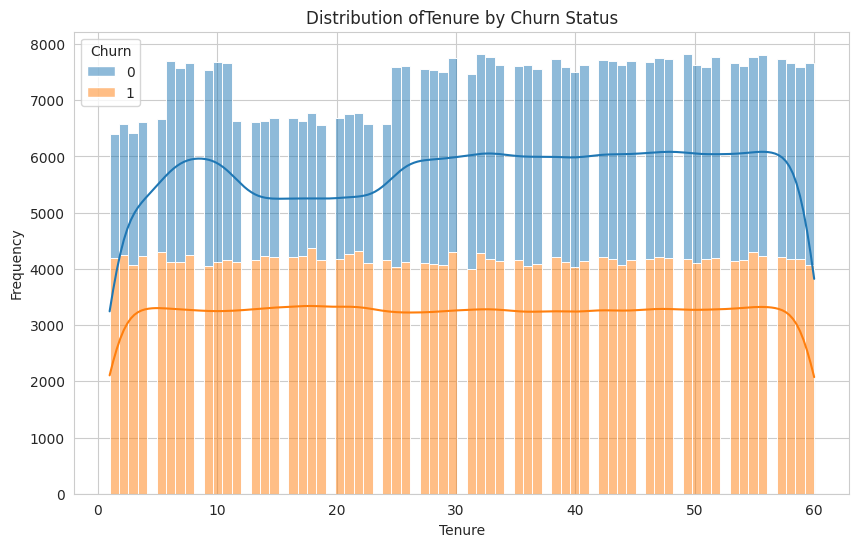

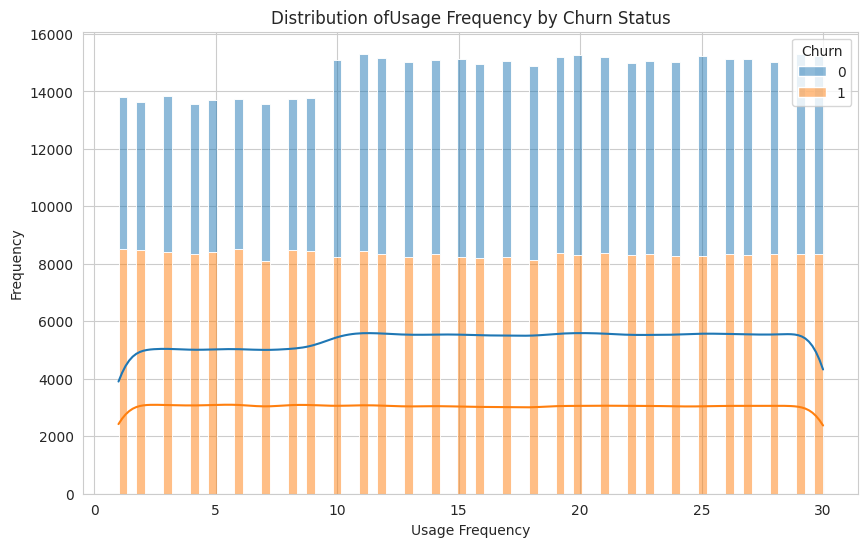

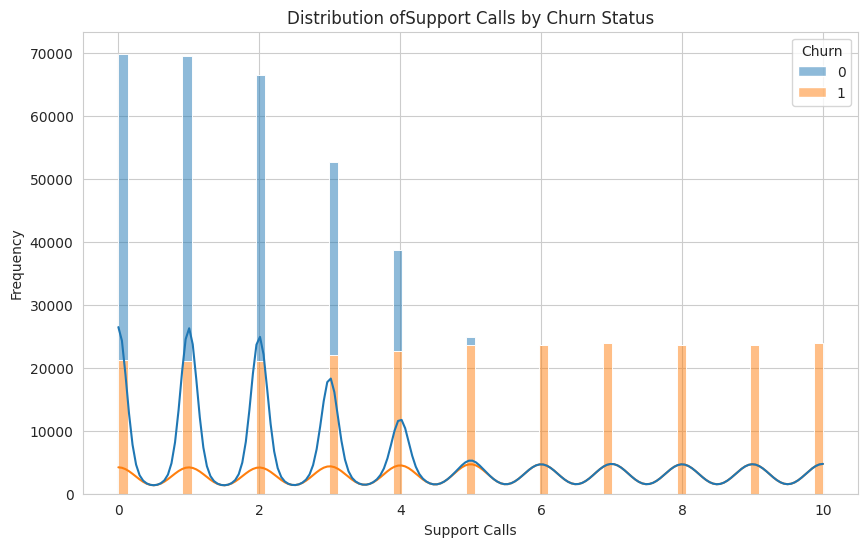

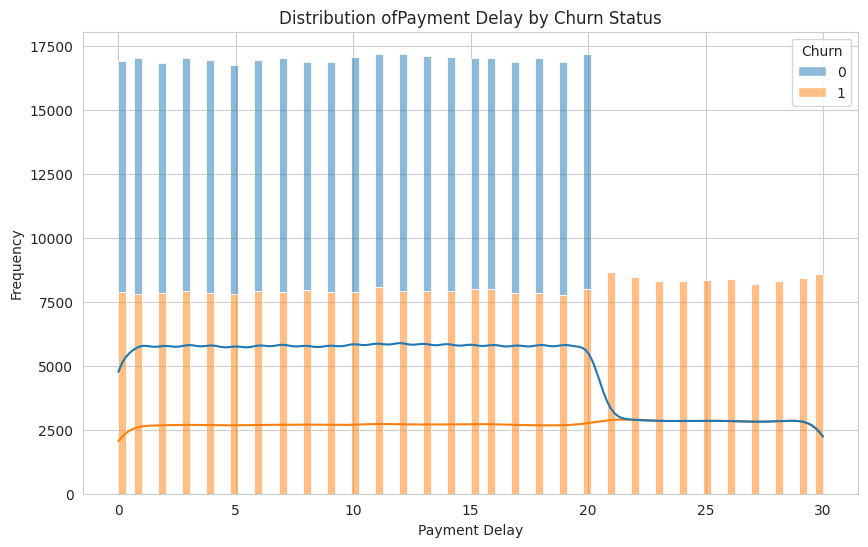

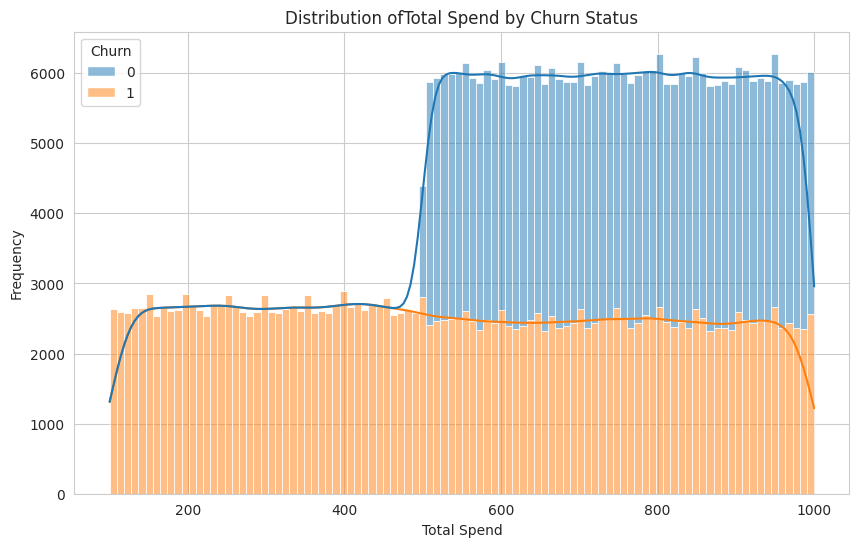

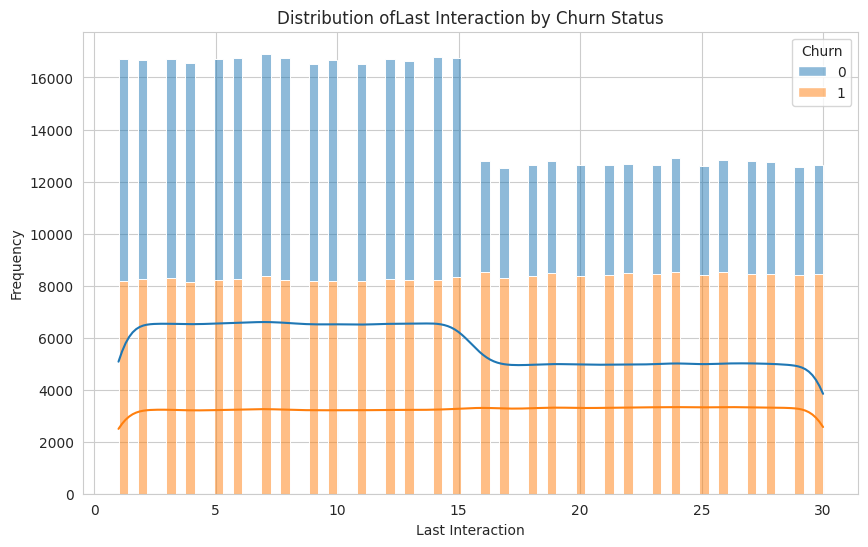

In [20]:
original_numerical_cols = ['Age','Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay','Total Spend', 'Last Interaction']

for col in original_numerical_cols:
  plt.figure(figsize=(8,6))
  sns.boxplot(x='Churn', y=col, data=df_train)
  plt.title(f'{col} vs. Churn')
  plt.xticks([0,1],['No Churn','Churn'])
  plt.xlabel('Churn Status')
  plt.ylabel(col)
  plt.show()

for col in original_numerical_cols:
  plt.figure(figsize=(10,6))
  sns.histplot(data=df_train, x=col, hue='Churn' , kde=True, multiple="stack")
  plt.title(f'Distribution of{col} by Churn Status')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()


----Churn Rate by Original Categorical Features---

Churn Rate by Gender:
   Gender     Churn
0  Female  0.666691
1    Male  0.491269


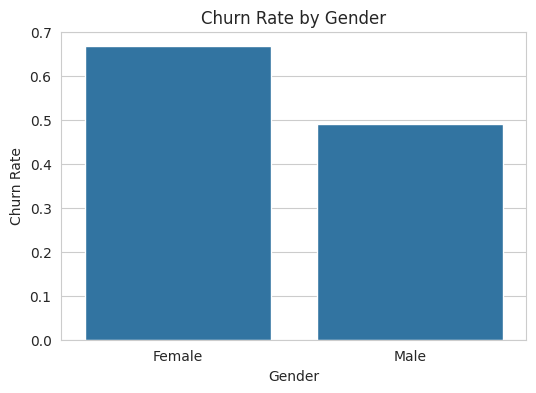


Churn Rate by Subscription Type:
  Churn rate for Premium: 55.94%
  Churn rate for Standard: 56.07%

Churn Rate by Contract Length:
  Churn rate for Monthly: 100.00%
  Churn rate for Quarterly: 46.03%
 Churn rate for base/dropped contract Length: 46.08%


In [21]:
print("----Churn Rate by Original Categorical Features---")

if 'Gender_Male' in df_train.columns:
  gender_churn_rate = df_train.groupby('Gender_Male')['Churn'].mean().reset_index()
  gender_churn_rate['Gender_Male']=gender_churn_rate['Gender_Male'].map({True:'Male', False:'Female'})
  gender_churn_rate.rename(columns={'Gender_Male':'Gender'}, inplace=True)
  print(f"\nChurn Rate by Gender:")
  print(gender_churn_rate)

  plt.figure(figsize=(6,4))
  sns.barplot(x='Gender',y='Churn',data=gender_churn_rate)
  plt.title('Churn Rate by Gender')
  plt.xlabel('Gender')
  plt.ylabel('Churn Rate')
  plt.show()
else:
  print("\nCould not find 'Gender_Male'. Check your one-hot encoded column names for Gender." )

sub_type_cols=[col for col in df_train.columns if 'Subscription Type_' in col]
if sub_type_cols:
  print("\nChurn Rate by Subscription Type:")
  for col_name in sub_type_cols:
    original_category_name= col_name.replace('Subscription Type_', '')
    churn_rate = df_train[df_train[col_name]==True]['Churn'].mean()
    print(f"  Churn rate for {original_category_name}: {churn_rate:.2%}")

contract_len_cols = [col for col in df_train.columns if 'Contract Length_' in col ]
if contract_len_cols:
  print("\nChurn Rate by Contract Length:")
  for col_name in contract_len_cols:
    original_category_name = col_name.replace('Contract Length_', '')
    churn_rate= df_train[df_train[col_name]==True]['Churn'].mean()
    print(f"  Churn rate for {original_category_name}: {churn_rate:.2%}")


  base_category_condition_contract = (df_train[contract_len_cols]== False).all(axis=1)
  base_churn_rate_contract = df_train[base_category_condition_contract]['Churn'].mean()
  print(f" Churn rate for base/dropped contract Length: {base_churn_rate_contract:.2%}")


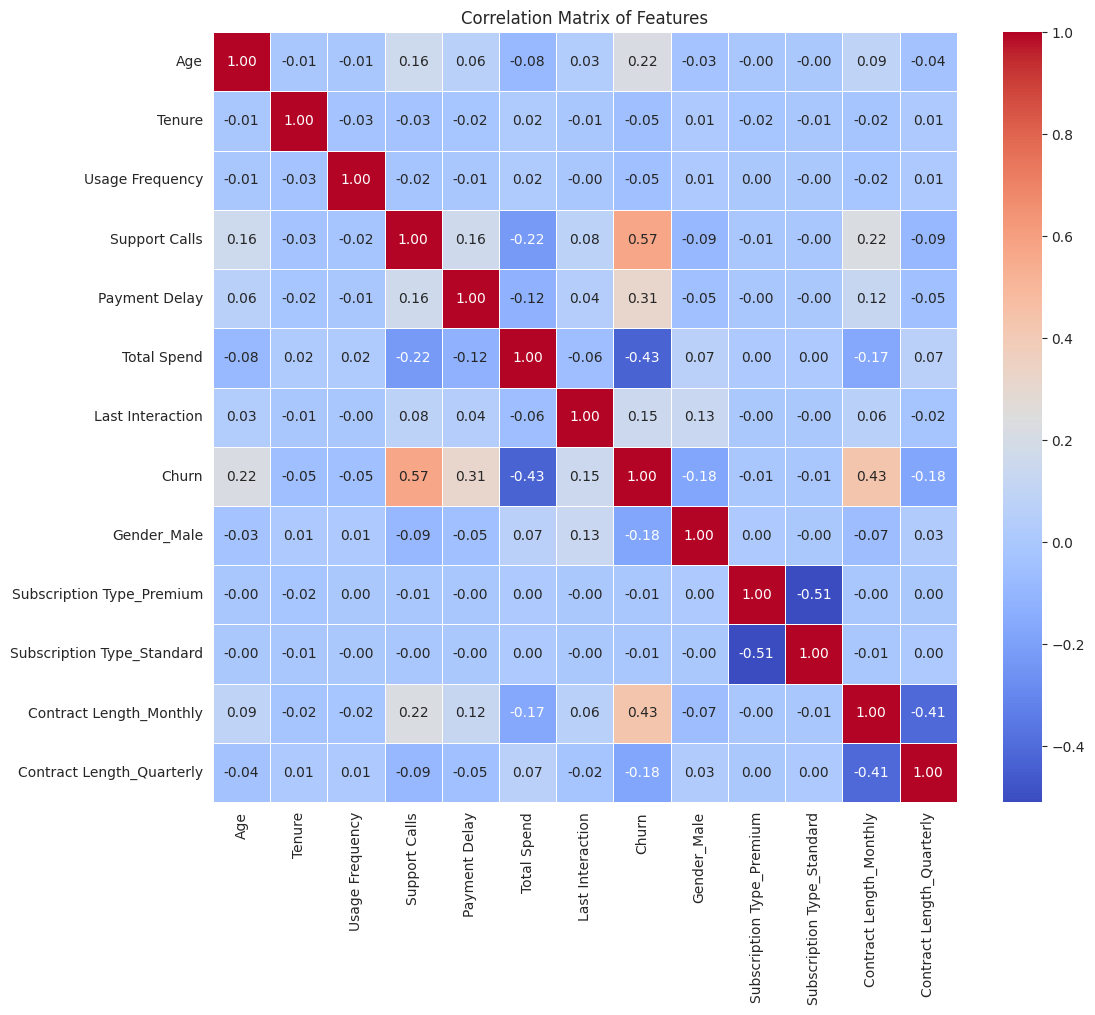


Correlation with Churn variable (sorted):
Churn                         1.000000
Support Calls                 0.574267
Contract Length_Monthly       0.433553
Payment Delay                 0.312129
Age                           0.218394
Last Interaction              0.149616
Subscription Type_Standard   -0.009247
Subscription Type_Premium    -0.011072
Usage Frequency              -0.046101
Tenure                       -0.051919
Gender_Male                  -0.175395
Contract Length_Quarterly    -0.176244
Total Spend                  -0.429355
Name: Churn, dtype: float64


In [22]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot= True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

print("\nCorrelation with Churn variable (sorted):")
print(correlation_matrix['Churn'].sort_values(ascending=False))

In [23]:
from sklearn.model_selection import train_test_split
X = df_train.drop('Churn',axis=1)
y= df_train['Churn']

print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nShape of X_train (training features):", {X_train.shape})
print("\nShape of y_train (training features):", {y_train.shape})
print("\nShape of X_test (training features):", {X_test.shape})
print("\nShape of y_test (training features):", {y_test.shape})

print("\nChurn proportion in original y:", y.value_counts(normalize=True))
print("\nChurn proportion in y_train:", y_train.value_counts(normalize=True))
print("\nChurn proportion in y_test:", y_test.value_counts(normalize=True))

Shape of X (features): (440832, 12)
Shape of y (target): (440832,)

Shape of X_train (training features): {(352665, 12)}

Shape of y_train (training features): {(352665,)}

Shape of X_test (training features): {(88167, 12)}

Shape of y_test (training features): {(88167,)}

Churn proportion in original y: Churn
1    0.567107
0    0.432893
Name: proportion, dtype: float64

Churn proportion in y_train: Churn
1    0.567108
0    0.432892
Name: proportion, dtype: float64

Churn proportion in y_test: Churn
1    0.567106
0    0.432894
Name: proportion, dtype: float64


----Training Logistic Regression Model---
Logistic Regression model trained successfully

-----Evaluating Logistic Regression Model Performance----
Accuracy: 0.8933
This means the model correctly predicted the outcome for 89.33% of the customers in the test set.

Confusion Matrix:
[[34486  3681]
 [ 5729 44271]]


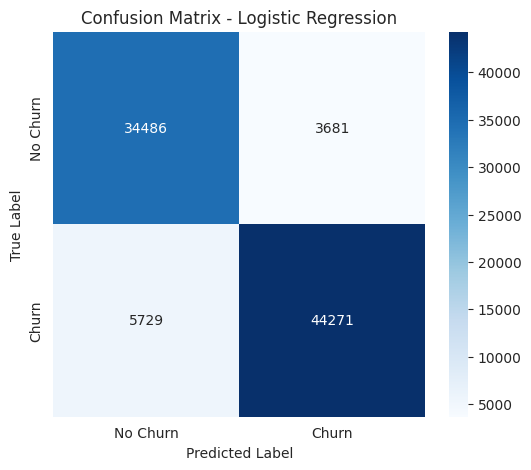


Classification Report:
              precision    recall  f1-score   support

No Churn (0)       0.86      0.90      0.88     38167
   Churn (1)       0.92      0.89      0.90     50000

    accuracy                           0.89     88167
   macro avg       0.89      0.89      0.89     88167
weighted avg       0.89      0.89      0.89     88167



In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

print("----Training Logistic Regression Model---")
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)
log_reg_model.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully")

y_pred_log_reg= log_reg_model.predict(X_test_scaled)

print("\n-----Evaluating Logistic Regression Model Performance----")

accuracy= accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy: {accuracy:.4f}")
print(f"This means the model correctly predicted the outcome for {accuracy:.2%} of the customers in the test set.")

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
print(conf_matrix)

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

print("\nClassification Report:")
class_report = classification_report(y_test, y_pred_log_reg, target_names=['No Churn (0)', 'Churn (1)'])
print(class_report)

----Training Random Forest Model---
Random Forest model trained successfully

-----Evaluating Random Forest Model Performance----
Accuracy: 0.9995

Confusion Matrix:
[[38164     3]
 [   37 49963]]


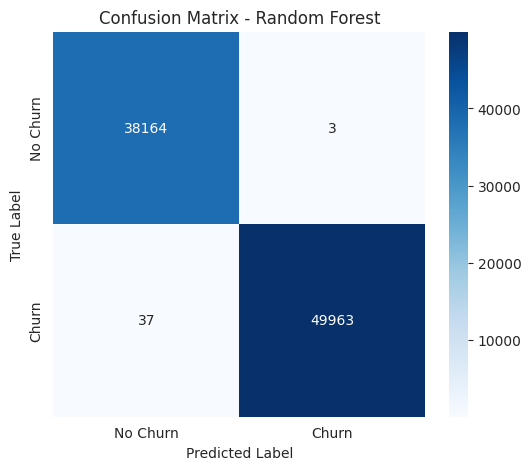


Classification Report:
              precision    recall  f1-score   support

No Churn (0)       1.00      1.00      1.00     38167
   Churn (1)       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



In [25]:
from sklearn.ensemble import RandomForestClassifier

print("----Training Random Forest Model---")
rf_model= RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully")

y_pred_rf= rf_model.predict(X_test)

print("\n-----Evaluating Random Forest Model Performance----")
accuracy_rf= accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

print("\nConfusion Matrix:")
conf_matrix_rf= confusion_matrix(y_test,y_pred_rf)
print(conf_matrix_rf)

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

print("\nClassification Report:")
class_report_rf = classification_report(y_test, y_pred_rf, target_names=['No Churn (0)', 'Churn (1)'])
print(class_report_rf)


In [26]:
contract_cols_to_drop = [col for col in df_train.columns if 'Contract Length_' in col]
print(f"Columns related to 'Contract Length' to be dropped: {contract_cols_to_drop}" )

df_train_no_leak  = df_train.drop(columns=contract_cols_to_drop)
print(f"\nNew Shape of DataFrame without leaky features: {df_train_no_leak.shape}")

X_no_leak = df_train_no_leak.drop('Churn', axis=1)
y_no_leak = df_train_no_leak['Churn']

X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(
    X_no_leak, y_no_leak, test_size=0.2, random_state=42, stratify=y_no_leak
)

print("\n--- Re-training Random Forest on data WITHOUT leaky feature----")
rf_model_nl= RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model_nl.fit(X_train_nl, y_train_nl)
y_pred_rf_nl = rf_model_nl.predict(X_test_nl)

print("\n-----Evaluating Random Forest Model Performance----")
print("Accuracy:", accuracy_score(y_test_nl, y_pred_rf_nl))
print("\nNew Classification report:")
print(classification_report(y_test_nl, y_pred_rf_nl, target_names=['No Churn (0)', 'Churn (1)']))

Columns related to 'Contract Length' to be dropped: ['Contract Length_Monthly', 'Contract Length_Quarterly']

New Shape of DataFrame without leaky features: (440832, 11)

--- Re-training Random Forest on data WITHOUT leaky feature----

-----Evaluating Random Forest Model Performance----
Accuracy: 0.9879433348078079

New Classification report:
              precision    recall  f1-score   support

No Churn (0)       0.97      1.00      0.99     38167
   Churn (1)       1.00      0.98      0.99     50000

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



---Features Importances from Random Forest Model----
                      Feature  Importance
3               Support Calls    0.326123
5                 Total Spend    0.234045
0                         Age    0.159936
4               Payment Delay    0.152203
6            Last Interaction    0.054071
7                 Gender_Male    0.039729
1                      Tenure    0.018728
2             Usage Frequency    0.010645
8   Subscription Type_Premium    0.002287
9  Subscription Type_Standard    0.002234


<ipython-input-29-b2277db64293>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data = feature_importance_df, palette='viridis')


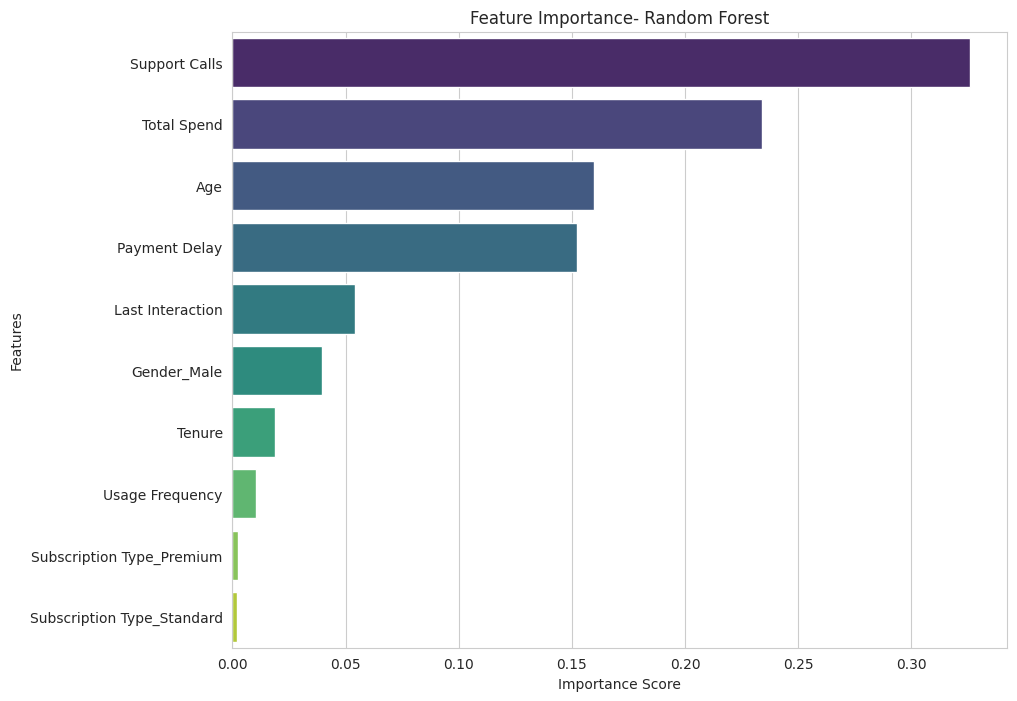

In [29]:
importances = rf_model_nl.feature_importances_
feature_names = X_train_nl.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df= feature_importance_df.sort_values(by='Importance',ascending=False)

print("---Features Importances from Random Forest Model----")
print(feature_importance_df)

plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data = feature_importance_df, palette='viridis')
plt.title('Feature Importance- Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()